In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# Apple 기본 폰트인 'AppleGothic' 사용
mpl.rcParams['font.family'] = 'AppleGothic'

# 음수 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

pd.set_option("display.max_columns", None)


In [109]:
# 분석용 편의 함수
def pct(n): return f"{n:.1%}"

# 모든 시간을 XX:00:00 으로 바꾸는 함수.
def round_by_half_hour(td):
    hour = td.components.hours
    minute = td.components.minutes

    if minute < 30:
        return pd.to_timedelta(f"{hour}:00:00")
    else:
        return pd.to_timedelta(f"{hour + 1}:00:00")

In [103]:
df = (
    pd.read_csv("1st-dataset.csv", parse_dates=["game_date"])  # 날짜 파싱
)

sportsType = "야구"

if sportsType in ["야구", "축구", "농구", "배구"]:
    df = df[df['sports_type'] == sportsType]

                  건수      비율
precipitation   1769   85.4%
audience         471   22.7%
death_count      461   22.2%
injury_count     461   22.2%
accident_count   461   22.2%
snow_depth      2072  100.0%
match_type        21    1.0%
home_team_win      0    0.0%
stadium_code       0    0.0%
start_time         0    0.0%
region             0    0.0%
is_holiday         0    0.0%
day_of_week        0    0.0%
game_date          0    0.0%
temperature        0    0.0%
sports_type        0    0.0%
game_id            0    0.0%


/opt/anaconda3/envs/myFirstProj/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myFirstProj/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myFirstProj/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myFirstProj/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myFirstProj/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50984 (

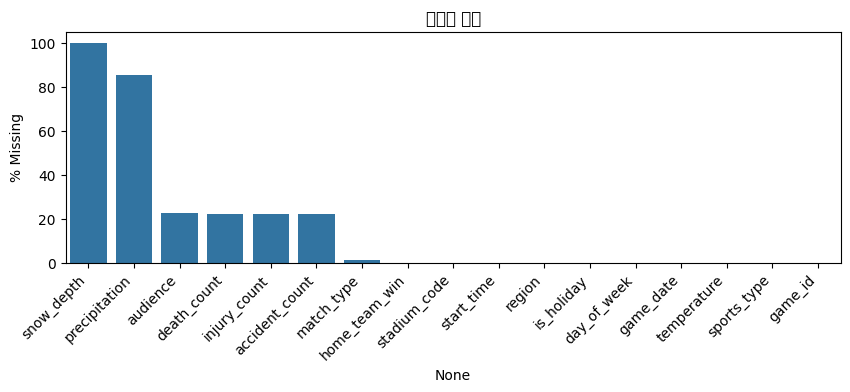

In [ ]:
# 결측치 체크
na_cnt   = df.isna().sum()
na_rate  = (na_cnt/len(df)).map(pct)
na_report = pd.concat([na_cnt, na_rate], axis=1, keys=["건수", "비율"])
print(na_report.sort_values("비율", ascending=False))

# 결측치 시각화 ---------------
plt.figure(figsize=(10,3))
sns.barplot(x=na_pct.index, y=na_pct.values)
plt.xticks(rotation=45, ha="right"); plt.ylabel("% Missing")
plt.title("결측치 비율"); plt.show()

In [105]:
df[df['accident_count'].isnull()]

,game_id,stadium_code,sports_type,game_date,day_of_week,is_holiday,start_time,home_team_win,match_type,audience,region,accident_count,injury_count,death_count,temperature,precipitation,snow_depth
1,2,SO04,야구,2023-03-13,월,0,0 days 14:00:00,0,시범경기,NaN,서울 구로구,NaN,NaN,NaN,6.6,NaN,NaN
2,3,CW01,야구,2023-03-13,월,0,0 days 14:00:00,0,시범경기,NaN,경남 창원시,NaN,NaN,NaN,8.3,NaN,NaN
6,7,SO04,야구,2023-03-14,화,0,0 days 14:00:00,0,시범경기,NaN,서울 구로구,NaN,NaN,NaN,15.2,NaN,NaN
7,8,CW01,야구,2023-03-14,화,0,0 days 14:00:00,0,시범경기,NaN,경남 창원시,NaN,NaN,NaN,15.0,NaN,NaN
10,11,SO04,야구,2023-03-15,수,0,0 days 13:00:00,0,시범경기,NaN,서울 구로구,NaN,NaN,NaN,14.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,2009,CW01,야구,2024-08-26,화,0,0 days 18:30:00,1,페넌트레이스,NaN,경남 창원시,NaN,NaN,NaN,29.0,NaN,NaN
2047,2011,SO04,야구,2024-08-27,수,0,0 days 18:30:00,0,페넌트레이스,14421.0,서울 구로구,NaN,NaN,NaN,28.4,NaN,NaN
2050,2014,CW01,야구,2024-08-27,수,0,0 days 18:30:00,1,페넌트레이스,4814.0,경남 창원시,NaN,NaN,NaN,27.5,NaN,NaN
2052,2016,SO04,야구,2024-08-28,목,0,0 days 18:30:00,0,페넌트레이스,13929.0,서울 구로구,NaN,NaN,NaN,30.9,NaN,NaN


In [87]:

# 기본 치환: '페넌트레이스'·'순위결정전'(오탈자 '순위결정정' 포함)·'0' --> '정규시즌'
df["match_type"] = (
    df["match_type"]
        .replace({"페넌트레이스": "정규시즌",
                  "순위결정전": "정규시즌",
                  "순위결정정": "정규시즌",   # 오타까지 함께 처리
                  '조별리그' : "정규시즌",
                  "0": "정규시즌"})
        # ➋ 라운드 표기(1R ~ 33R 등) → 정규시즌
        .str.replace(r"^\d+R$", "정규시즌", regex=True)
)

df["match_type"] = (
    df["match_type"]
        .replace({'와일드카드':"포스트시즌",
                '준플레이오프':"포스트시즌", 
                '플레이오프':"포스트시즌", 
                '한국시리즈':"포스트시즌",
                '파이널 라운드A':"포스트시즌",
                '파이널 라운드B':"포스트시즌",
                '챔피언결정전':"포스트시즌", 
                '준결승':"포스트시즌", 
                '결승':"포스트시즌",
                '올스타전':"포스트시즌"}
                )
)
# 결과 확인
print(df["match_type"].unique())




['시범경기' '정규시즌' '포스트시즌']


In [89]:
# 문자열을 timedelta64로 변환
df['start_time'] = pd.to_timedelta(df['start_time'])

# 시작시각 → 시간 숫자(0~23) 추출
df["start_hour"] = df['start_time'].dt.components['hours']

In [90]:
# -----------------------------------------------------------
# match_type 기준 ~ accident_count : ANOVA & ETA²
# -----------------------------------------------------------
aov = pg.anova(dv="accident_count", between="match_type", data=df, detailed=True)
print(aov.columns)
eta = aov["np2"][0]
#eta = pg.compute_effsize(df, dv="accident_count", between="match_type", eftype="eta-square")
print("ANOVA\n", aov, "\nETA² =", eta)
#print("ANOVA\n", aov)

print("-----------------------")

# 보너스: 사후검정
posthoc = pairwise_tukeyhsd(df["accident_count"], df["match_type"])
print(posthoc)

Index(['Source', 'SS', 'DF', 'MS', 'F', 'p-unc', 'np2'], dtype='object')
ANOVA
        Source            SS    DF          MS         F     p-unc       np2
0  match_type    318.397457     2  159.198729  8.751597  0.000164  0.008578
1      Within  36800.028999  2023   18.190820       NaN       NaN       NaN 
ETA² = 0.008577881332544729
-----------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  시범경기   정규시즌   0.8543  0.088 -0.0952 1.8038  False
  시범경기  포스트시즌   3.4308 0.0001  1.5054 5.3561   True
  정규시즌  포스트시즌   2.5764 0.0012  0.8698 4.2831   True
---------------------------------------------------


In [91]:
# -----------------------------------------------------------
# 휴일 기준 ~ accident_count : ANOVA & ETA²
# -----------------------------------------------------------
aov = pg.anova(dv="accident_count", between="is_holiday", data=df, detailed=True)
print(aov.columns)
eta = aov["np2"][0]
#eta = pg.compute_effsize(df, dv="accident_count", between="match_type", eftype="eta-square")
print("ANOVA\n", aov, "\nETA² =", eta)
#print("ANOVA\n", aov)

print("-----------------------")

# 보너스: 사후검정
posthoc = pairwise_tukeyhsd(df["accident_count"], df["is_holiday"])
print(posthoc)

Index(['Source', 'SS', 'DF', 'MS', 'F', 'p-unc', 'np2'], dtype='object')
ANOVA
        Source            SS    DF          MS          F    p-unc      np2
0  is_holiday    355.611157     1  355.611157  19.578397  0.00001  0.00958
1      Within  36762.815299  2024   18.163446        NaN      NaN      NaN 
ETA² = 0.009580448079495383
-----------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.8734   0.0 -1.2606 -0.4863   True
---------------------------------------------------


In [92]:
# -----------------------------------------------------------
# 요일 기준 ~ accident_count : ANOVA & ETA²
# -----------------------------------------------------------
aov = pg.anova(dv="accident_count", between="day_of_week", data=df, detailed=True)
print(aov.columns)
eta = aov["np2"][0]
#eta = pg.compute_effsize(df, dv="accident_count", between="match_type", eftype="eta-square")
print("ANOVA\n", aov, "\nETA² =", eta)
#print("ANOVA\n", aov)

print("-----------------------")

# 보너스: 사후검정
posthoc = pairwise_tukeyhsd(df["accident_count"], df["day_of_week"])
print(posthoc)

Index(['Source', 'SS', 'DF', 'MS', 'F', 'p-unc', 'np2'], dtype='object')
ANOVA
         Source            SS    DF         MS         F     p-unc       np2
0  day_of_week    484.828812     6  80.804802  4.453423  0.000174  0.013062
1       Within  36633.597644  2019  18.144427       NaN       NaN       NaN 
ETA² = 0.013061674696324365
-----------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     금      목  -0.6254 0.5202 -1.6279 0.3771  False
     금      수  -0.0533    1.0 -1.0598 0.9532  False
     금      월  -0.2109 0.9999 -2.1092 1.6875  False
     금      일   -1.388 0.0006  -2.366  -0.41   True
     금      토  -0.3455 0.9442 -1.3242 0.6331  False
     금      화   -0.065    1.0 -1.0526 0.9225  False
     목      수   0.5721 0.6286  -0.432 1.5763  False
     목      월   0.4146 0.9953 -1.4825 2.3117  False
     목      일  -0.7626 0.2409 -1.7381  0.213  False
     목      토  

In [93]:
# -----------------------------------------------------------
# 홈팀 승패 여부 ~ accident_count : ANOVA & ETA²
# -----------------------------------------------------------
aov = pg.anova(dv="accident_count", between="home_team_win", data=df, detailed=True)
print(aov.columns)
eta = aov["np2"][0]
#eta = pg.compute_effsize(df, dv="accident_count", between="match_type", eftype="eta-square")
print("ANOVA\n", aov, "\nETA² =", eta)
#print("ANOVA\n", aov)

print("-----------------------")

# 보너스: 사후검정
posthoc = pairwise_tukeyhsd(df["accident_count"], df["home_team_win"])
print(posthoc)

Index(['Source', 'SS', 'DF', 'MS', 'F', 'p-unc', 'np2'], dtype='object')
ANOVA
           Source            SS    DF         MS         F     p-unc       np2
0  home_team_win      8.060337     1   8.060337  0.439611  0.507386  0.000217
1         Within  37110.366119  2024  18.335161       NaN       NaN       NaN 
ETA² = 0.00021715191470044444
-----------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.1262 0.5074 -0.247 0.4993  False
--------------------------------------------------


In [94]:
# 중복성 제거
dup_rows = df.duplicated().sum()
dup_keys = df.duplicated(subset=["game_date","region","game_id"], keep=False).sum()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 0 to 2025
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   game_id         2026 non-null   int64          
 1   stadium_code    2026 non-null   object         
 2   sports_type     2026 non-null   object         
 3   game_date       2026 non-null   object         
 4   day_of_week     2026 non-null   object         
 5   is_holiday      2026 non-null   int64          
 6   start_time      2026 non-null   timedelta64[ns]
 7   home_team_win   2026 non-null   int64          
 8   match_type      2026 non-null   object         
 9   audience        2026 non-null   int64          
 10  region          2026 non-null   object         
 11  accident_count  2026 non-null   float64        
 12  injury_count    2026 non-null   float64        
 13  death_count     2026 non-null   float64        
 14  temperature     2026 non-null   float64      

In [97]:
# 범주형 Cardinality & 정제
for col in ["sports_type", "day_of_week", "match_type", "is_holiday", "region"]:
    print(df[col].value_counts(dropna=False).head(20), "\n")


sports_type
야구    2026
Name: count, dtype: int64 

day_of_week
일    350
토    349
화    336
목    316
금    313
수    311
월     51
Name: count, dtype: int64 

match_type
정규시즌     1873
시범경기      118
포스트시즌      35
Name: count, dtype: int64 

is_holiday
0    1299
1     727
Name: count, dtype: int64 

region
서울 송파구     398
경남 창원시     222
경기 수원시     212
광주 북구      205
대전 중구      204
부산 동래구     201
인천 미추홀구    201
대구 수성구     185
서울 구로구     178
울산 남구       12
충북 청주시       6
경기 이천시       2
Name: count, dtype: int64 



In [ ]:
# 필요 변수 One-Hot Encoding 진행
df_encoded = pd.get_dummies(df, columns=['match_type'], prefix='match', drop_first=False)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 0 to 2025
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   game_id         2026 non-null   int64          
 1   stadium_code    2026 non-null   object         
 2   sports_type     2026 non-null   object         
 3   game_date       2026 non-null   object         
 4   day_of_week     2026 non-null   object         
 5   is_holiday      2026 non-null   int64          
 6   start_time      2026 non-null   timedelta64[ns]
 7   home_team_win   2026 non-null   int64          
 8   audience        2026 non-null   int64          
 9   region          2026 non-null   object         
 10  accident_count  2026 non-null   float64        
 11  injury_count    2026 non-null   float64        
 12  death_count     2026 non-null   float64        
 13  temperature     2026 non-null   float64        
 14  precipitation   2026 non-null   float64      

In [100]:
# csv 로 1차 데이타셋 저장
df_encoded.to_csv("1st-dataset-prepressed-baseball.csv", index=False, encoding='utf-8')

In [80]:
num_cols = ["accident_count","injury_count","death_count"]
desc = df[num_cols].describe().T   # min-max, IQR
q1,q3 = df["accident_count"].quantile([.25,.75])
iqr   = q3-q1
out   = df[(df["accident_count"] < q1-1.5*iqr) | (df["accident_count"] > q3+1.5*iqr)]

In [98]:
# 상관관계·다중공선성 확인
corr = df.corr(numeric_only=True)
target_corr = corr["accident_count"].sort_values(ascending=False)
# print(corr)
print(target_corr)

accident_count    1.000000
injury_count      0.943465
start_hour        0.107631
death_count       0.093535
game_id           0.016578
home_team_win     0.014736
temperature      -0.001184
precipitation    -0.033496
is_holiday       -0.097880
audience               NaN
snow_depth             NaN
Name: accident_count, dtype: float64


In [ ]:
# from ydata_profiling import ProfileReport
# ProfileReport(df, title="1차 데이터셋 품질 리포트").to_file("eda_quality_report.html")

ModuleNotFoundError: No module named 'ydata_profiling'